In [1]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import matplotlib.animation as anm
import matplotlib.patches as patches
import math
import numpy as np

In [33]:
class World:
    def __init__(self,debug=False):
        self.objects=[]
        self.debug=debug
    
    def append(self,obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))
        ax=fig.add_subplot(111)
        ax.set_aspect('equal')
        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_xlabel("X",fontsize=10)
        ax.set_ylabel("Y",fontsize=10)
        
        elems=[]
        
        if self.debug:
            for frame in range(3): self.one_step(frame,ax,elems)
        else:
            self.ani = anm.FuncAnimation(fig=fig,func=self.one_step,frames=50,fargs=(ax,elems),interval=100,repeat=False)
            plt.show()
    
    def one_step(self,frame,ax,elems):
        while elems: elems.pop().remove()
        elems.append(ax.text(-4.5,5,"time= "+str(frame),fontsize=10))
        for obj in self.objects:
            obj.draw(ax,elems)
            if hasattr(obj,"one_step"): obj.one_step(1.0)

In [34]:
class IdealRobot:
    def __init__(self,pose,agent,color="Black"):
        self.pose=pose
        self.r=0.2
        self.agent=agent
        self.color=color
        self.poses=[pose]
    
    def draw(self,ax,elems):
        x,y,theta=self.pose
        self.poses.append(self.pose)
        xn=x+self.r*math.cos(theta)
        yn=y+self.r*math.sin(theta)
        elems+=ax.plot([x,xn],[y,yn],color=self.color)
        c=patches.Circle(xy=(x,y),radius=self.r,fill=False,color=self.color)
        elems.append(ax.add_patch(c))
        
        elems+=ax.plot([e[0] for e in self.poses],[e[1] for e in self.poses],color="red")
    
    @classmethod
    def state_transition(cls,nu,omega,time,pose):
        t0 = pose[2]
        if math.fabs(omega) <1e-10: 
            return pose + np.array([nu*math.cos(t0)*time,
                                            nu*math.sin(t0)*time,
                                            omega*time])
        else:
            return pose + np.array([nu/omega*(math.sin(t0 + omega*time) - math.sin(t0)),
                                            nu/omega*(-math.cos(t0 +omega*time) + math.cos(t0)),
                                            omega*time])
    
    def one_step(self,time_interval):
        if not self.agent:return
        nu,omega = self.agent.decision()
        self.pose = self.state_transition(nu,omega,time_interval,self.pose)

In [35]:
class Agent:
    def __init__(self,nu,omega):
        self.nu=nu
        self.omega=omega
    def decision(self):
        return self.nu,self.omega

<IPython.core.display.Javascript object>


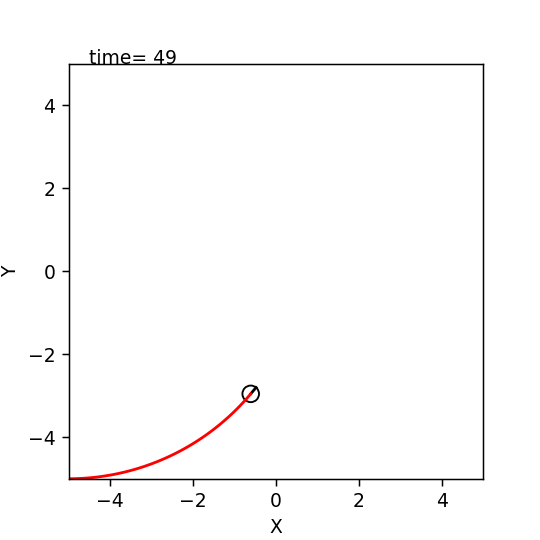

In [36]:
world = World(debug=False)
straight = Agent(0.1,1/180*math.pi)
robot1=IdealRobot(np.array([-5,-5,0]),straight)
world.append(robot1)
world.draw()